In [1]:
import numpy as np
import matplotlib.pyplot as plt
import reading

Datos de la señal segun la descripcion del dataset y del paper.

In [2]:
data_length = 4096 # d
timesteps = 2048
data_dim = data_length//timesteps # L
srate = 173.61



`reshape_signal`  segun la metodologia descrita en la seccion 4.2.1

In [3]:
def reshape_signal(raw_signal):
    return reading.segment_data(raw_signal[0:data_length], timesteps, data_dim)

In [4]:
ubonn_data, ubonn_labels = reading.load_ubonn()
ubonn_data.shape

(2000, 4097)

In [5]:
def gaussian_noise(signal, strength = 1):
    noise = np.random.normal(0,1,len(signal)) * strength
    return signal + noise

Comparacion de una señal en crudo vs una señal con ruido blanco añadido

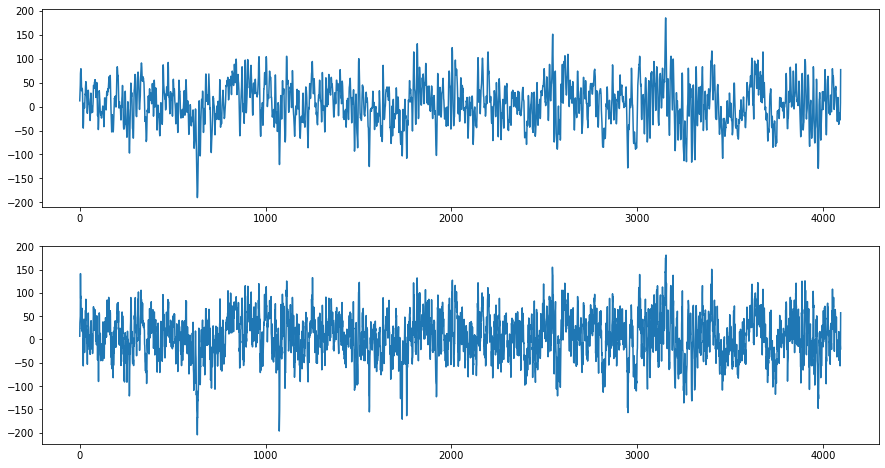

In [6]:
raw = ubonn_data[0]
noisy = gaussian_noise(ubonn_data[0], strength=20)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))
ax1.plot(raw[:len(raw)])
ax2.plot(noisy[:len(raw)])


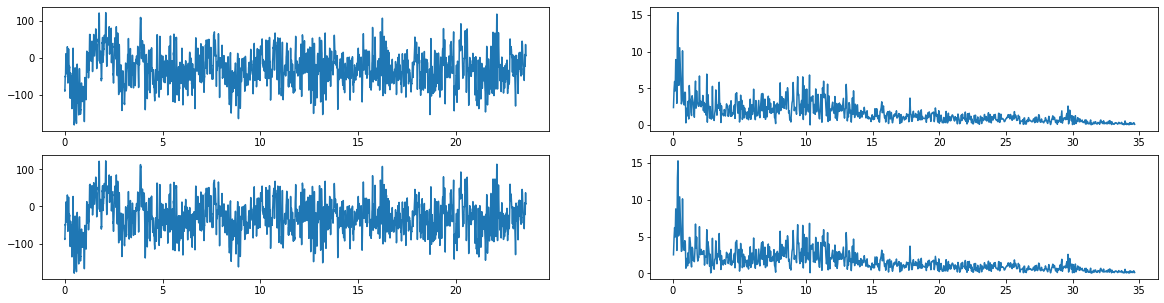

In [7]:
from scipy.signal import butter, lfilter, freqz, firwin
from scipy.fft import fft, fftfreq
eyes = 5
orig = eyes + 300
z_eyes_1 = ubonn_data[eyes]
z_normal = ubonn_data[orig]

original_fft = fft(z_eyes_1)
original_freqs = fftfreq(z_eyes_1.shape[0], 1/srate)

eyes_fft = fft(z_normal)
eyes_freqs = fftfreq(z_normal.shape[0], 1/srate)

t = np.linspace(0, data_length/srate, data_length + 1, endpoint=False)

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))
ax11.plot(t, z_eyes_1, label='Raw signal')
ax12.plot(original_freqs[1:data_length//5], 2/data_length * np.abs(original_fft[1:data_length//5]))

ax21.plot(t, z_normal, label='Noisy signal')
ax22.plot(eyes_freqs[1:data_length//5], 2/data_length * np.abs(eyes_fft[1:data_length//5]))
ax1.grid(True)
ax2.grid(True)
plt.show()